## Clustering Anomaly Detection Exercises

In [2]:
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
# DBSCAN import
from sklearn.cluster import DBSCAN
# Scaler import
from sklearn.preprocessing import MinMaxScaler
from env import get_db_url

---

#### grocery_customers - grocery_db

In [6]:
query = 'SELECT * FROM grocery_customers'
df = pd.read_sql(query, get_db_url('grocery_db'), index_col='customer_id')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
customer_id,,,,,,,,
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
frozen_detergents_deli = df[['Frozen', 'Detergents_Paper', 'Delicassen']]
frozen_detergents_deli.head()


,Frozen,Detergents_Paper,Delicassen
customer_id,,,
0,214,2674,1338
1,1762,3293,1776
2,2405,3516,7844
3,6404,507,1788
4,3915,1777,5185


In [8]:
scaler = MinMaxScaler()
scaler.fit(frozen_detergents_deli)
frozen_detergents_deli = scaler.transform(frozen_detergents_deli)
frozen_detergents_deli

array([[0.0031063 , 0.0654272 , 0.02784731],
       [0.02854842, 0.08058985, 0.03698373],
       [0.03911643, 0.08605232, 0.16355861],
       ...,
       [0.00677142, 0.36346267, 0.03888194],
       [0.01664914, 0.00404174, 0.04426366],
       [0.00065742, 0.01161082, 0.00102211]])

In [9]:
dbsc = DBSCAN(eps = .10, min_samples = 20)
dbsc.fit(frozen_detergents_deli)


DBSCAN(eps=0.1, min_samples=20)

In [10]:
columns = ["Frozen", "Detergents_Paper", "Delicassen"]
scaled_columns = ["Scaled_" + column for column in columns]
original_df = df.copy()
scaled_df = pd.DataFrame(frozen_detergents_deli, columns=scaled_columns)
df = df.merge(scaled_df, on=df.index)
df = df.drop(columns=['key_0'])
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Scaled_Frozen,Scaled_Detergents_Paper,Scaled_Delicassen
0,2,3,12669,9656,7561,214,2674,1338,0.003106,0.065427,0.027847
1,2,3,7057,9810,9568,1762,3293,1776,0.028548,0.080590,0.036984
2,2,3,6353,8808,7684,2405,3516,7844,0.039116,0.086052,0.163559
3,1,3,13265,1196,4221,6404,507,1788,0.104842,0.012346,0.037234
4,2,3,22615,5410,7198,3915,1777,5185,0.063934,0.043455,0.108093


In [11]:
df['labels'] = dbsc.labels_
df.labels.value_counts()

 0    423
-1     17
Name: labels, dtype: int64

In [12]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Scaled_Frozen,Scaled_Detergents_Paper,Scaled_Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,0.003106,0.065427,0.027847,0
1,2,3,7057,9810,9568,1762,3293,1776,0.028548,0.080590,0.036984,0
2,2,3,6353,8808,7684,2405,3516,7844,0.039116,0.086052,0.163559,0
3,1,3,13265,1196,4221,6404,507,1788,0.104842,0.012346,0.037234,0
4,2,3,22615,5410,7198,3915,1777,5185,0.063934,0.043455,0.108093,0


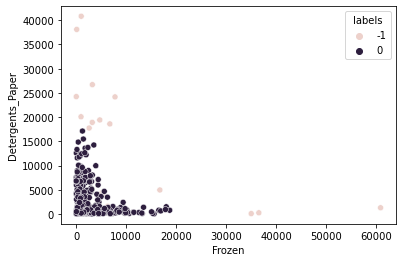

In [14]:
sns.scatterplot(df.Frozen, df.Detergents_Paper, hue=df.labels)
plt.show()

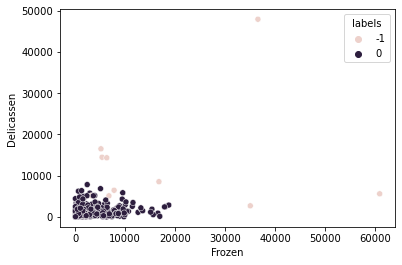

In [15]:
sns.scatterplot(df.Frozen, df.Delicassen, hue=df.labels)
plt.show()

Text(0.5, 0, 'Deli')

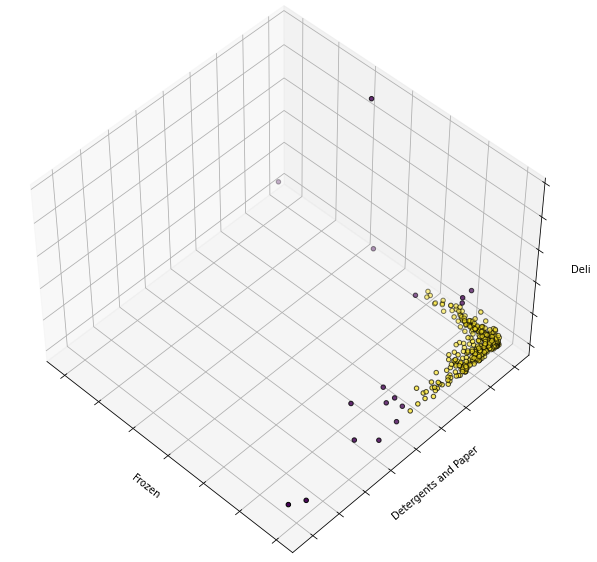

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plot the points
ax.scatter(df.Frozen, df.Detergents_Paper, df.Delicassen,
           c=df.labels, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Frozen')
ax.set_ylabel('Detergents and Paper')
ax.set_zlabel('Deli')

---

#### Curriculum access logs = curriculum_logs_db

In [17]:
query = 'SELECT * FROM logs'
df = pd.read_sql(query, get_db_url('curriculum_logs'))
df.head()

,date,time,path,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
